# 0.0. IMPORTS

In [1]:
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment, greater good
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average 
#level of construction and design, and 11-13 have a high quality level of construction and design. reater good
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px

from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import inflection
import warnings

## 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [27, 16]
    plt.rcParams['font.size'] = 20
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
warnings.filterwarnings( 'ignore' )
pd.options.display.float_format = '{:.2f}'.format

In [4]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [5]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [6]:
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2425,2162000160,20150303T000000,992000.00,3,2.25,2950,15207,1.00,0,0,4,10,2070,880,1966,0,98040,47.56,-122.22,2950,22000
1011,7214820030,20141212T000000,475000.00,3,1.75,2020,8970,1.00,0,0,4,7,1180,840,1981,0,98072,47.76,-122.14,2140,8008
8921,8820903080,20150508T000000,455000.00,2,1.00,910,5759,1.00,0,0,3,6,910,0,1951,0,98125,47.72,-122.28,1520,7518
6554,1839910470,20150408T000000,450000.00,3,1.75,1540,7490,1.00,0,0,5,7,1540,0,1971,0,98034,47.72,-122.18,1270,7350
19816,9477580030,20141014T000000,962000.00,4,2.75,3340,5700,2.00,0,0,3,11,3340,0,2013,0,98059,47.51,-122.15,3340,6940


# 1.0. DATA DESCRIPTION

In [7]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [8]:
print(f"Number Of Rows: {df1.shape[0]}" )
print(f"Number Of Cols: {df1.shape[1]}" )

Number Of Rows: 21613
Number Of Cols: 21


## 1.2. Data Types

In [9]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [11]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [12]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [13]:
num_attributes = df1.drop( ['date','waterfront'], axis=1 )

In [14]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [15]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
9,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19


In [16]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [17]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

# 2.0.  FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

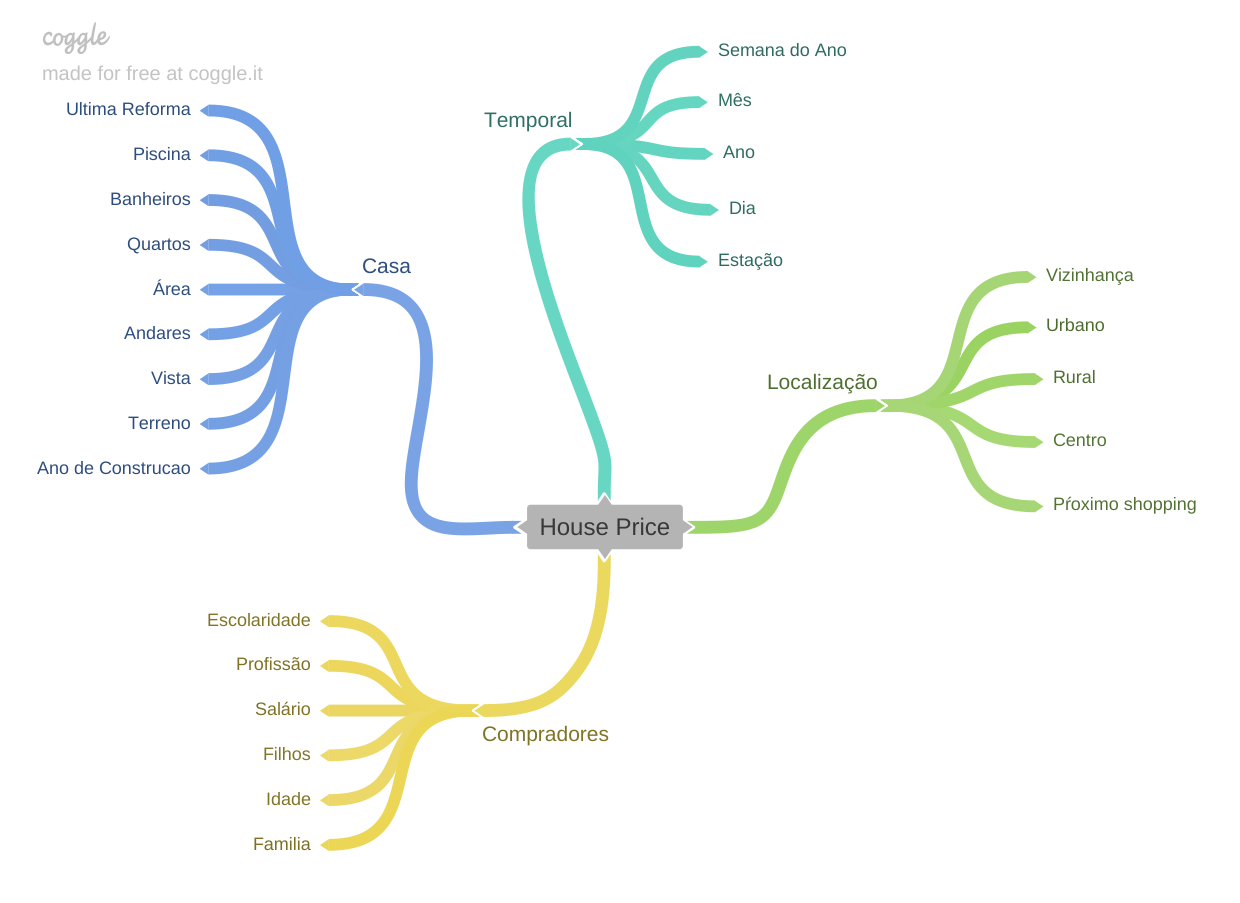

In [19]:
Image( 'image/House_Price.png' )

## 2.2. Criacao de Hipoteses

### 2.2.1. Hipoteses casa

#### 1. Casas com mais quartos deveriam ter o preço maior.

#### 2. Casas com mais banheiros deveriam ter o preço maior.

#### 3. Casas com maior área útil deveriam ter o preço maior. 

#### 4. Casas que se encontram em terrenos maiores deveriam ter o preço maior.

#### 5. Casas com mais andares deveriam ter o preço maior. 

#### 6. Casas com vista para a aguá deveriam ter o preço maior.

#### 7. Casas com melhor vista deveriam ter o preço maior.

#### 8. Casas em melhores condiçoes deveriam ter o preço maior.

#### 9. Casas com maior qualidade deveriam ter o preço maior. 

#### 10. Casas que possuem porão deveriam ter o preço maior. 

#### 11. Casas contruidas recentemente deveriam ter o preço maior.

#### 12. Casas reformadas recentemente deveriam ter o preço maior.

#### 13. Casas que possuem vizinhos com grandes áreas deveriam ter o preço maior.

### 2.2.2. Hipoteses Localizacao

#### 1. Casas localizadas em regiões centrais deveriam ter o preço maior.

#### 2. Casas localizadas em áreas urbanas deveriam ter o preço maior. 

#### 3. Casas localizadas pŕoximas a shoppings centers deveriam ter o preço maior. 

### 2.2.3. Hipoteses Tempo

#### 1. Deveriam ser vendidas mais casas ao final do ano. 

#### 2. Deveriam ser vendidas mais casas em estações de clima frio.

#### 3. Deveriam ser vendidas mais casas na segunda metade do mês.

### 2.2.4. Lista Final de Hipoteses

#### 1. Casas com mais quartos deveriam ter o preço maior.

#### 2. Casas com mais banheiros deveriam ter o preço maior.

#### 3. Casas com maior área útil deveriam ter o preço maior. 

#### 4. Casas que se encontram em terrenos maiores deveriam ter o preço maior.

#### 5. Casas com mais andares deveriam ter o preço maior. 

#### 6. Casas com vista para a aguá deveriam ter o preço maior.

#### 7. Casas com melhor vista deveriam ter o preço maior.

#### 8. Casas em melhores condiçoes deveriam ter o preço maior.

#### 9. Casas com maior qualidade deveriam ter o preço maior. 

#### 10. Casas que possuem porão deveriam ter o preço maior. 

#### 11. Casas contruidas recentemente deveriam ter o preço maior.

#### 12. Casas reformadas recentemente deveriam ter o preço maior.

#### 13. Casas que possuem vizinhos com grandes áreas deveriam ter o preço maior.

#### 14. Deveriam ser vendidas mais casas ao final do ano. 

#### 15. Deveriam ser vendidas mais casas em estações de clima frio.

#### 16. Deveriam ser vendidas mais casas na segunda metade do mês.

## 2.3. Feature Engineering 

In [32]:
# Ano
df2['year'] = df2['date'].dt.year

# Mes
df2['month'] = df2['date'].dt.month

# Dia
df2['day'] = df2['date'].dt.day

# Semana do Ano
df2['week_of_year'] = df2['date'].dt.weekofyear

# Estações
df2['season'] = df2['month'].apply( lambda x: 'winter' if x in [12, 1 ,2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'autumn' )



In [21]:
df2.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


# 3.0. ANALISE EXPLORATORIA DE DADOS

In [22]:
df3 = df2.copy()

## 3.1. Analise Univariada

### 3.1.1. Response Variable

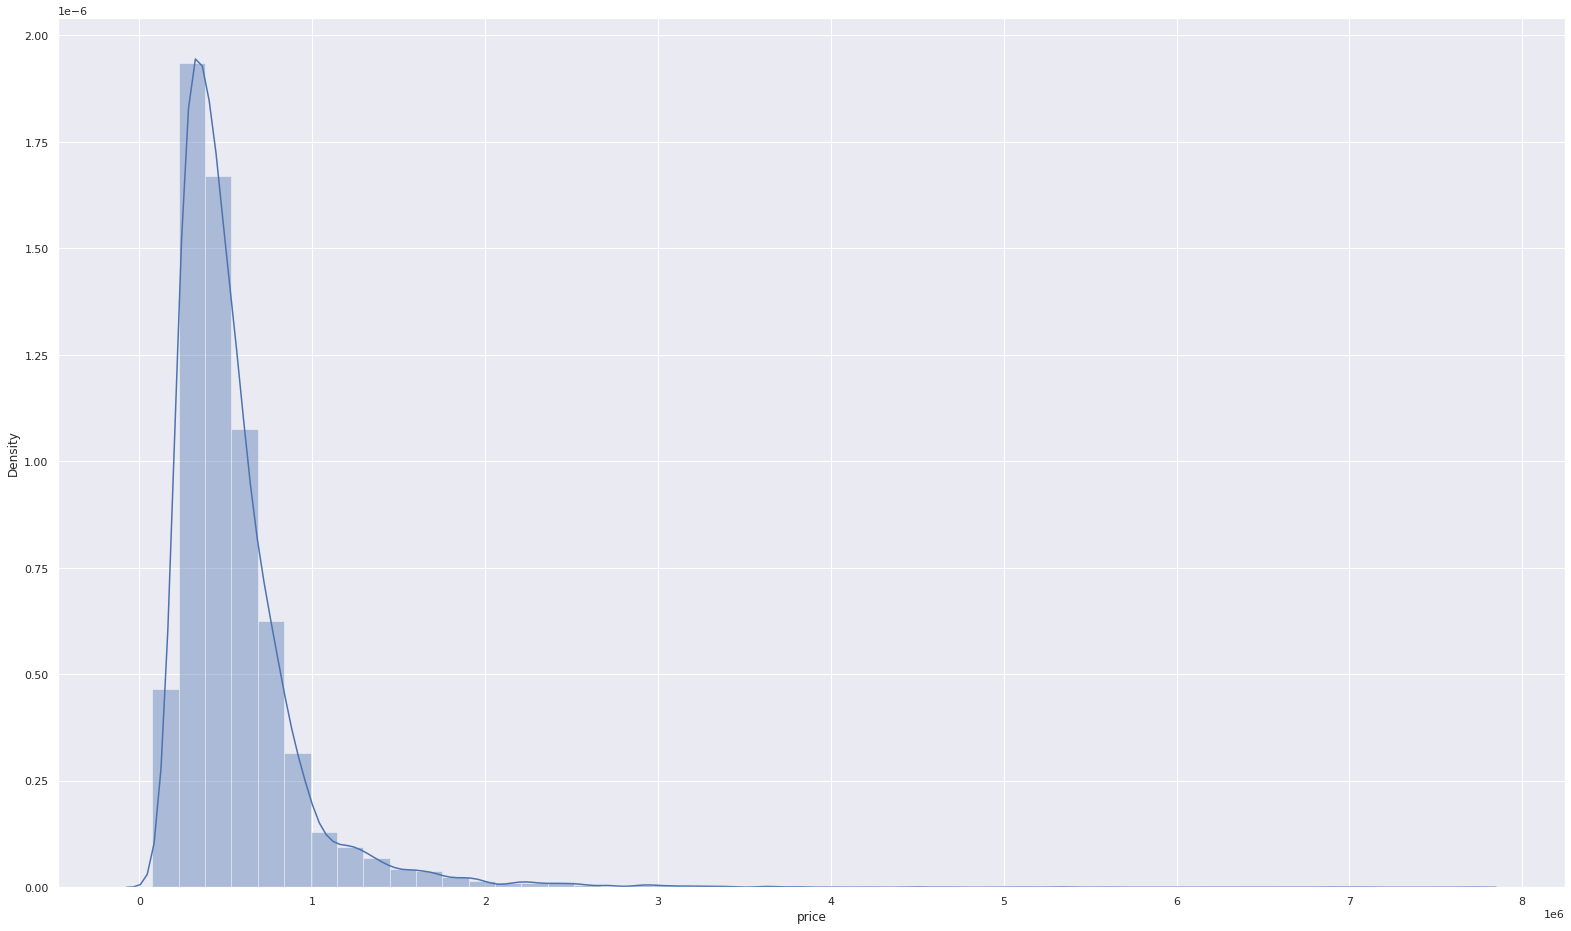

In [23]:
sns.distplot( df3['price'] );

### 3.1.2 Numerical Variable 

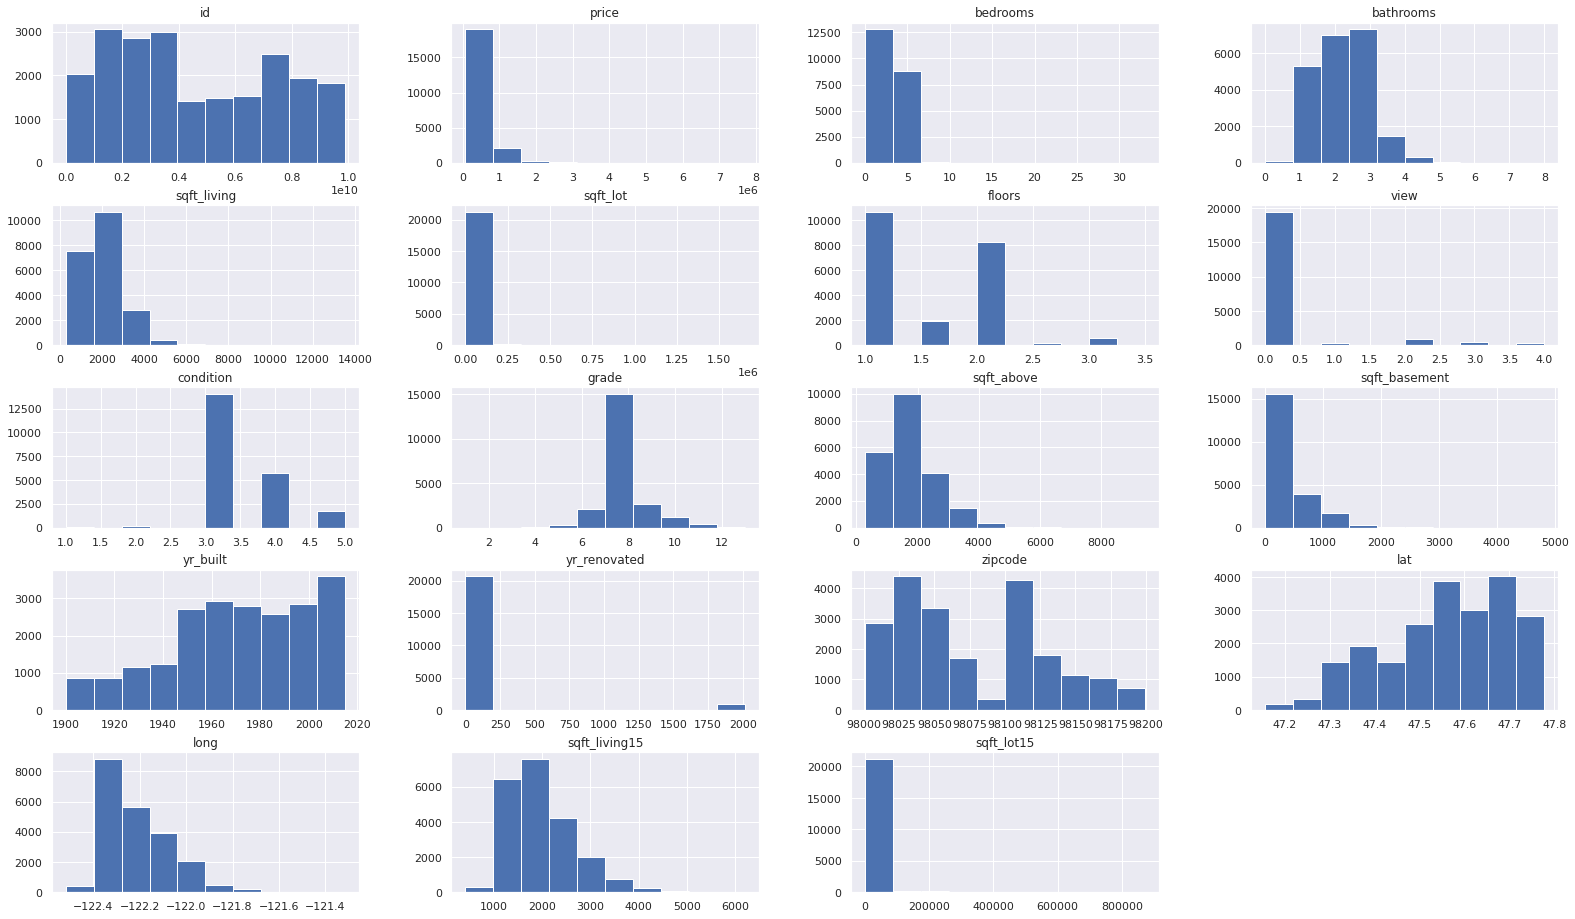

In [25]:
num_attributes.hist()
plt.show()

## 3.2. Analise Bivariada

### H1. Casas com mais quartos deveriam ter o preço maior.
**VERDADEIRO** Casas com mais quartos, em média, tem preços maiores

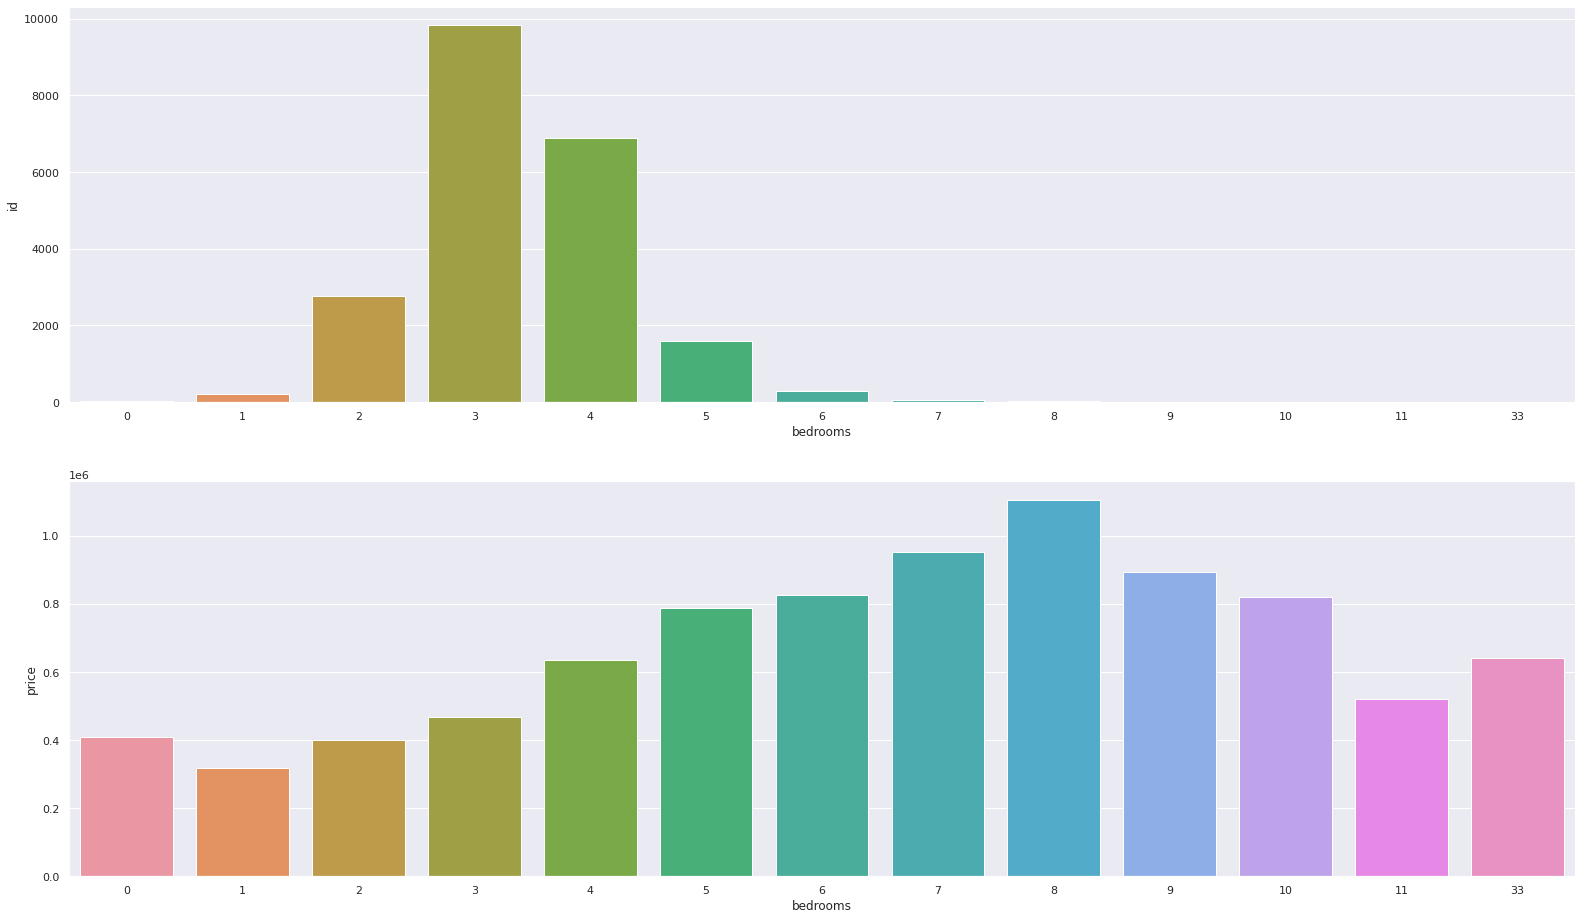

In [26]:
plt.subplot(2, 1, 1)
aux1 = df3[['bedrooms','id']].groupby('bedrooms').count().reset_index()
sns.barplot( x='bedrooms', y='id', data=aux1);

plt.subplot(2, 1, 2)
aux2 = df3[['bedrooms', 'price']].groupby( 'bedrooms').mean().reset_index()
sns.barplot( x='bedrooms', y='price', data=aux2 );

In [37]:
(df3[['id']].loc[df3['bedrooms'] > 8]).count().reset_index()

,index,0
0,id,11


### H2. Casas com mais banheiros deveriam ter o preço maior.

### H3. Casas com maior área útil deveriam ter o preço maior. 

### H4. Casas que se encontram em terrenos maiores deveriam ter o preço maior.

### H5. Casas com mais andares deveriam ter o preço maior. 

### H6. Casas com vista para a aguá deveriam ter o preço maior.

### H7. Casas com melhor vista deveriam ter o preço maior.

### H8. Casas em melhores condiçoes deveriam ter o preço maior.

### H9. Casas com maior qualidade deveriam ter o preço maior. 

### H10. Casas que possuem porão deveriam ter o preço maior.

### H11. Casas contruidas recentemente deveriam ter o preço maior.

### H12. Casas reformadas recentemente deveriam ter o preço maior.

### H13. Casas que possuem vizinhos com grandes áreas deveriam ter o preço maior.

### H14. Deveriam ser vendidas mais casas ao final do ano. 

### H15. Deveriam ser vendidas mais casas em estações de clima frio.

### H16. Deveriam ser vendidas mais casas na segunda metade do mês.

## 3.2. Analise Multivariada

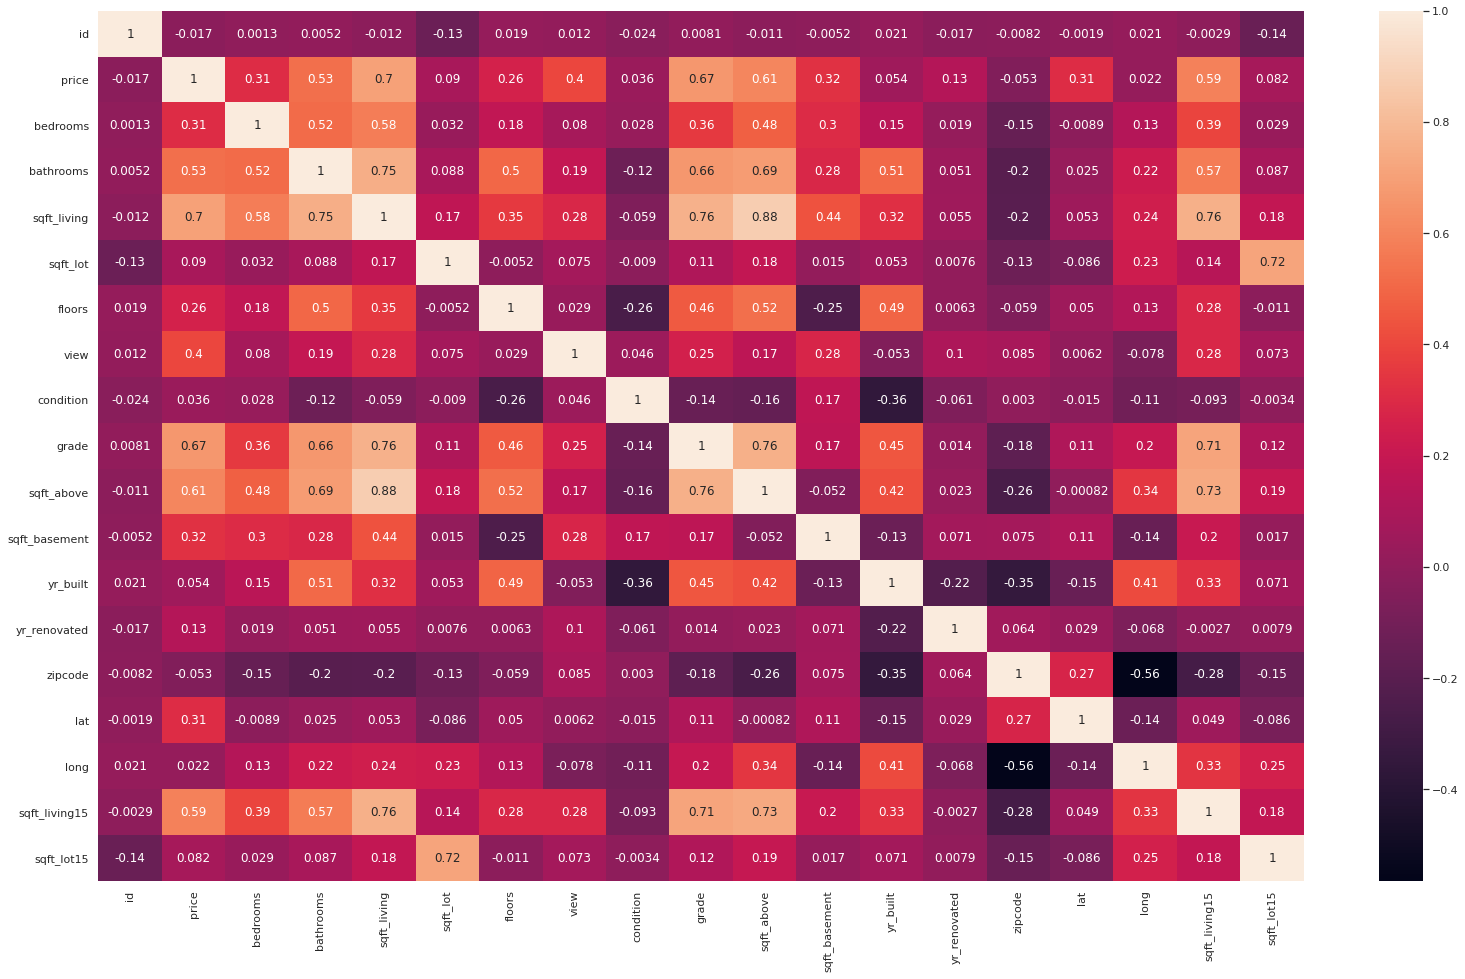

In [28]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

In [29]:
#houses = df2[['id', 'lat', 'long', 'price']]

#fig = px.scatter_mapbox( houses,
                         #lat = 'lat',
                         #lon = 'long',
                         #size = 'price',
                         #color_continuous_scale = px.colors.cyclical.IceFire,
                         #size_max=15,
                         #zoom=10 )

#fig.update_layout( mapbox_style = 'open-street-map' )
#fig.update_layout( height=900, margin={ 'r': 0, 't': 0, 'l': 0, 'b': 0 } )
#fig.show()